In [1]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
import string

In [2]:
dat=pd.read_excel("Data/AT 186.xlsx")
dat

,Wavelength (nm),A,Ar,A avg,B,Br,B avg,C,Cr,C avg,...,L avg,M,Mr,M avg,N,Nr,N avg,O,Or,O avg
0,436.059998,17.629141,17.980148,17.804645,25.490694,22.015293,23.752994,20.006056,19.221718,19.613887,...,26.219925,28.104439,23.924654,26.014546,29.409874,26.387497,27.898685,22.951216,21.228739,22.089977
1,436.959992,7.703491,6.554571,7.129031,8.385644,7.336792,7.861218,8.093204,7.947737,8.020471,...,10.836452,9.849966,10.494743,10.172355,12.589928,11.972995,12.281461,9.265826,8.585759,8.925793
2,438.029999,5.336022,5.456125,5.396073,5.312477,5.842636,5.577556,6.487201,5.917610,6.202405,...,9.532759,7.825727,7.770525,7.798126,10.592906,10.016624,10.304765,8.132057,6.987058,7.559557
3,438.929993,5.922232,5.181684,5.551958,5.808640,5.242127,5.525384,6.298000,5.720571,6.009285,...,8.851180,7.363575,6.757473,7.060524,10.468397,9.751576,10.109987,8.407888,6.500430,7.454159
4,440.000000,4.670334,5.101032,4.885683,4.823444,4.814972,4.819208,5.232860,5.630205,5.431532,...,8.812635,6.179430,6.656563,6.417996,10.006009,9.868306,9.937158,7.247627,7.571867,7.409747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,696.049988,0.143499,0.040843,0.092171,0.170265,0.029551,0.099908,2.289123,2.027815,2.158469,...,5.255503,0.172684,0.197800,0.185242,7.040080,7.093071,7.066576,7.666417,7.596228,7.631322
261,697.039978,0.175687,0.111922,0.143805,0.122916,-0.005903,0.058507,2.157568,2.004933,2.081251,...,5.904876,0.123641,0.139798,0.131720,6.764220,6.550324,6.657272,7.506993,7.229101,7.368047
262,698.020019,-0.011975,0.047742,0.017884,0.099666,0.117537,0.108602,2.167639,1.823360,1.995499,...,5.813050,0.141571,0.088904,0.115237,6.670919,6.190115,6.430517,7.134406,7.432144,7.283275
263,699.010010,0.155227,0.129270,0.142248,0.046620,0.124253,0.085437,1.958197,1.985262,1.971730,...,4.954746,0.281937,0.152282,0.217109,6.041825,6.987067,6.514446,7.172810,7.603058,7.387934


In [3]:
x = list(dat['Wavelength (nm)'])
ys=[]
ys.append(list(dat['A avg']))
ys.append(list(dat['B avg']))
ys.append(list(dat['C avg']))
ys.append(list(dat['D avg']))
ys.append(list(dat['E avg']))
ys.append(list(dat['F avg']))
ys.append(list(dat['G avg']))
ys.append(list(dat['H avg']))
ys.append(list(dat['I avg']))
ys.append(list(dat['J avg']))
ys.append(list(dat['K avg']))
ys.append(list(dat['L avg']))
ys.append(list(dat['M avg']))
ys.append(list(dat['N avg']))
ys.append(list(dat['O avg']))

Concs={'A':0,'B':0.01,'C':0.02,'D':0.03,'E':0.04,'F':0.06,'G':0.08,'H':0.1,'I':0.5,'J':0.99,'K':0.015,'L':0.025,'M':0.005,'N':0.05,'O':0.035}
Letters=list(string.ascii_uppercase[0:15])

In [4]:
Letters

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']

In [6]:
bs=[]
for y in(ys):
    bs.append(max(y))


In [7]:
def Fitfunc(xdata,param1,param2):
    return param1*(xdata)/(param2+(xdata))

from scipy.optimize import curve_fit

Text(0.5, 1.0, 'MeCN/H$_2$O Solvent')

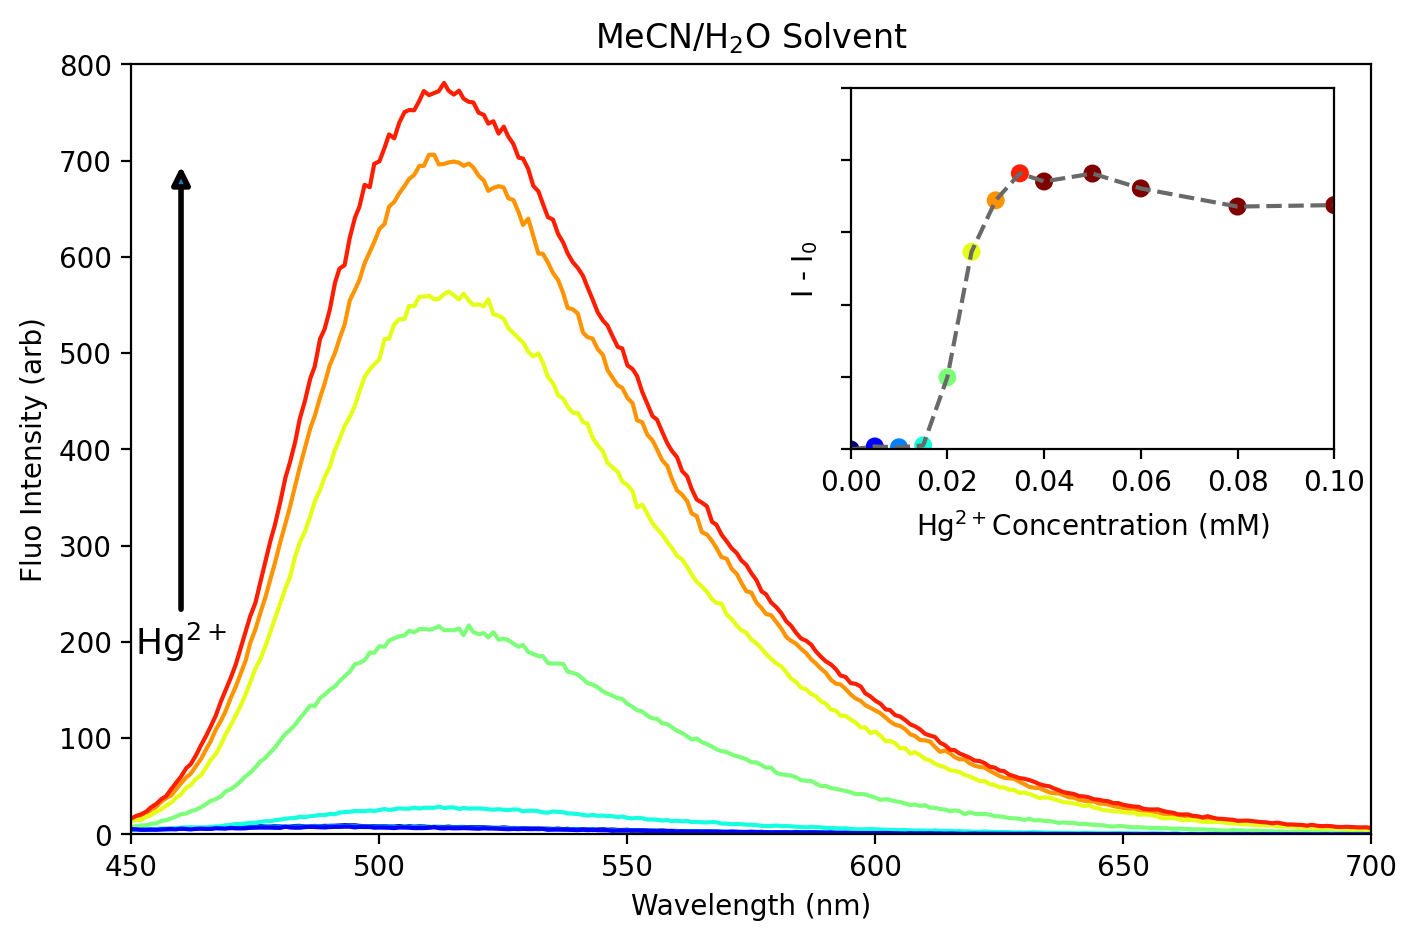

In [25]:
InsetX=[]
InsetY=[]
InsetCols=[]

plt.figure(figsize=(8,5),dpi=200)
for i in range(0,len(ys)):
    if(Concs[Letters[i]]<1.2):
        conc=float(Concs[Letters[i]]/0.04)
        col = plt.cm.jet(conc)
        if(conc<1):
            plt.plot(x,ys[i],color=col)
        InsetX.append(Concs[Letters[i]])
        InsetY.append(bs[i]-min(bs))
        InsetCols.append(col)
                        

thecurve=curve_fit(Fitfunc,InsetX,InsetY)
plt.xlim(450,700)
plt.ylim(0,800)
pylab.xlabel("Wavelength (nm)")
pylab.ylabel("Fluo Intensity (arb)")

ax = plt.gcf().gca()
ax.annotate('$\mathregular{Hg^{2+}}$', 
            xy=(460, 700),
            xycoords='data',
            xytext=(460, 200), 
            va='center',
            ha='center',
            fontsize=13,
            arrowprops={'arrowstyle': '-|>', 'lw': 2})
axins = ax.inset_axes(
    [0.58, 0.5, 0.39, 0.47],
    xlim=(0, 0.1), ylim=(0, 1e3),  yticklabels=[])
#axins.loglog()
#axins2 = inset_axes(ax, width="40%", height="50%", loc=1)
axins.scatter(InsetX,InsetY,c=InsetCols,s=30)
axins.plot(np.sort(InsetX),np.array(InsetY)[np.argsort(InsetX)],'--',color='dimgrey')
axins.set_xlabel("$\mathregular{Hg^{2+}}$Concentration (mM)")
axins.set_ylabel("I - $\mathregular{I_{0}}$ ")
plt.title("MeCN/H$_2$O Solvent")

In [ ]:

plt.figure(figsize=(15,10))
plt.scatter(v,w) 
g, h = np.polyfit(v, w, 1)
plt.plot(v, g*v+h)

cubic_interpolation_model = interp1d(v, w, kind = "cubic")
 
# Plotting the Graph
v_=np.linspace(v.min(), v.max(), 500)
w_=cubic_interpolation_model(v_)
 
plt.plot(v_, w_)

#plt.plot(a3,c3)
pylab.ylim(-10,850)
pylab.xlim(-0.1,2.1)
pylab.xlabel("$\mathregular{Hg^{2+}}$Concentration (uM)", fontsize=15)
pylab.ylabel("I - $\mathregular{I_{0}}$ ",fontsize=15)

plt.savefig('Fig10b.jpg')